# STAT207 Mini-Project #1 - Job Salary Analysis


Alfred Hofmann

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Introduction

### Research Question

How does the nature of the relationship between Years of Experience and Salary change for different values of Education Level in
the dataset?

### Research Motivation

Salary is one of the most, if not the most, important factors in consideration when it comes to job selection. This value is dependent on several different variables, some of which influence the salary more than others. Today, we will be narrowing these variables down to just three: years of experience, salary, and education level. 

The goal of this analysis is to determine whether the value of experience (in regard to salary) might differ based on the level of education of an individual. This information would be beneficial to people that are considering an extended education, if it might mean they would have to work for a shorter period of time to achieve a high salary. From the results of this analysis, these people could see how the relationship between years of exerpience and salary changes depending on education level, and weigh these results with their own interests.

## 2. Dataset Discussion

### Dataset Display

Let's take a look at the first few rows of this dataset.

In [2]:
df = pd.read_csv('salary_prediction_data.csv')
df.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


We also want to see the original number of rows in this dataset before any data cleaning.

In [3]:
original_rows = df.shape[0]
print(f'Original number of rows: {original_rows}')

Original number of rows: 1000


### Dataset Source

I found this dataset on [Kaggle](https://www.kaggle.com). Here is a link to the dataset: https://www.kaggle.com/datasets/mrsimple07/salary-prediction-data/data

I downloaded this dataset on February 12, 2024.

### Original Dataset Information

Each row of this dataset represents a distinct indivdual, with information about their education, years of experience, location, job title, age, gender, and salary. This is a synthetic dataset, with data collected via simulation. 

Also, this dataset is not inclusive of all possible types of observations that could be considered. For example, there are several more types of locations and different job titles that are not included. There also could have been more columns added for variables that impact salary, such as which school the individual attended. Because of this, the types of individuals mentioned in the research motivation will need to consider that these results will not be the same for everyone, and might change depending on factors not described in the dataset, like the specific school they attended. 

The three variables I am exploring in this analysis are experience, salary, and education. Experience is a numerical value representing the number of years of work experience the individual has, and is a commn predictor for salary. The salary column is also nuemrical, and represents the yearly compensation granted from the individual's job, presumably in USD, although this is not made clear in the dataset source. Education level is categorical, and represents the highest level of schooling the individual has completed.

## 3. Dataset Cleaning

### Missing Value Detection and Cleaning

First, we will check for any explicit missing values in the dataset.

In [4]:
# Total number of rows in the dataframe with a NaN value
df.isna().sum()

Education     0
Experience    0
Location      0
Job_Title     0
Age           0
Gender        0
Salary        0
dtype: int64

Looks like there are no explicit missing values in the dataset. Next, we will check for implicit missing values.

In [5]:
df.dtypes

Education      object
Experience      int64
Location       object
Job_Title      object
Age             int64
Gender         object
Salary        float64
dtype: object

To check if there are any implicit missing values, I check the datatypes to make sure that categorical variables are object types, and the numerical variables are all ints or floats.

Everything seems to check out, meaning there are no implicit or explicit missing values. This makes sense because as mentioned earlier, the data was collected by a simulation.

This means we won't have to drop any rows, which is good because no data will be lost. However, if we did have missing values, dropping them would have made it easier to work with the dataset and collect appropriate measurements and statistics.

### Sample Size Cleaning

I now want to check if every distinct value of the categorical variable I'm utilizing, education level, has at least 10 observations in the dataset that correspond to it.

In [6]:
df['Education'].value_counts()

Education
High School    255
Bachelor       253
PhD            251
Master         241
Name: count, dtype: int64

It appears that there are only four distinct values for this categorical variable, all of which have over 200 instances, meaning there's nothing to drop here.

### Outlier Cleaning - Single Variable Outlier Inspection

To check for single variable outliers, let's create a boxplot for each of our two numerical variables, experience and salary.

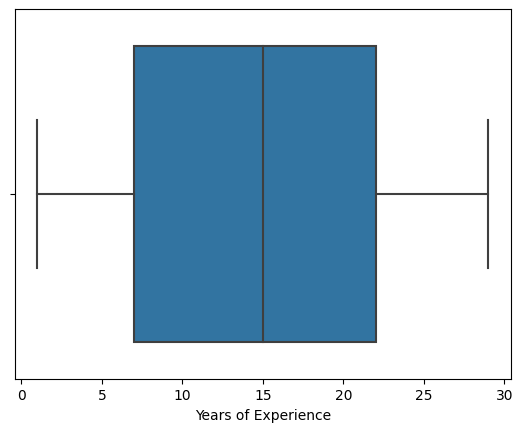

In [7]:
sns.boxplot(x=df['Experience'])
plt.xlabel('Years of Experience')
plt.show()

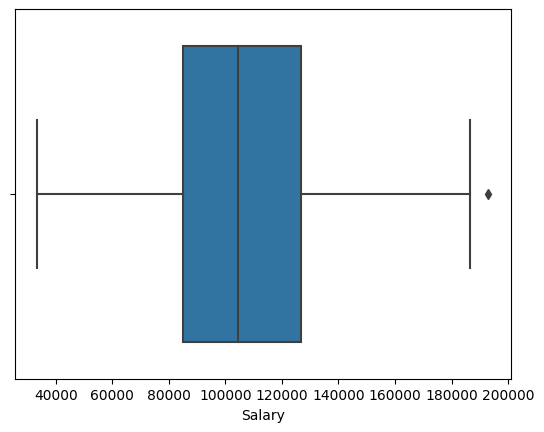

In [8]:
sns.boxplot(x=df['Salary'])
plt.show()

There are no outliers in the experience column, but it appears there is at least one outlier denoted by the boxplot for salary. Although its effect is relatively minimal for an outlier, removing it may help reduce the skew. Other pros include better model performance for non-outlier points if we ever wanted to create a linear regression model to predict salary. Removing outliers also helps with simplification of our analysis as well as cleaner data visualization. Cons removing the outlier could be potential loss of important information, and if a model was created it would likely be worse at predicting outlier points. In this instance, we will choose to remove any outliers.

In [9]:
df['Salary'].max()

193016.60214967115

In [10]:
df = df[df['Salary'] < 193000]
new_rows = df.shape[0]
rows_dropped = original_rows - new_rows
print(f'Rows dropped: {rows_dropped}')

Rows dropped: 1


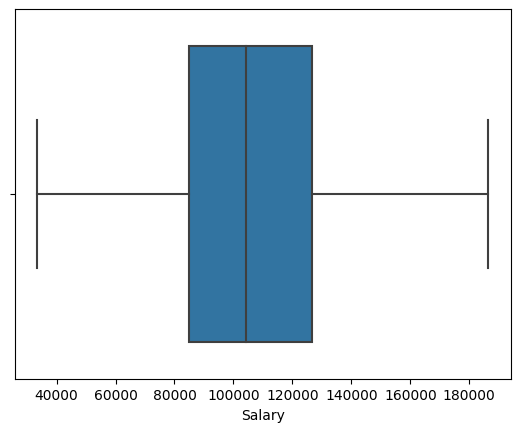

In [11]:
sns.boxplot(x=df['Salary'])
plt.show()

It seems like our only outlier was where the salary was highest. One row was dropped from the original dataset.

### Outlier Cleaning - Two Variable Outlier Inspection

Now we will create a scatterplot with our two numerical variables to detect any more outliers that may be present.

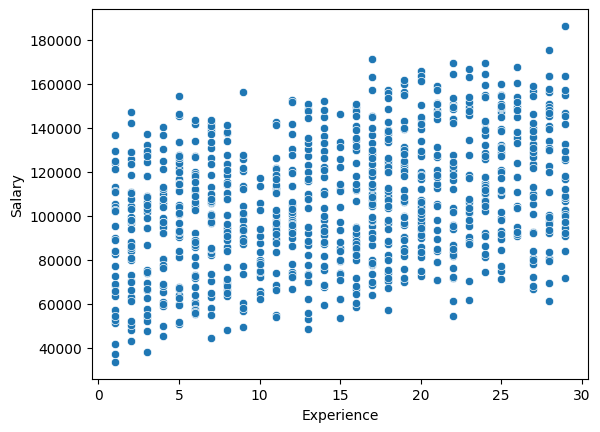

In [12]:
sns.scatterplot(x=df['Experience'], y=df['Salary'])
plt.show()

There are no outliers, so we don't have to worry about potentially dropping any more rows.

### Other Data Cleaning

There is no further data cleaning ideas that I had that would potentially make answering the research question more clear.

## 4. <u>Research Question</u>: How does the Relationship between Years of Experience and Salary Change based on Different Values of Education Level in the Dataset?

### Research Question Statement
How does the relationship between Years of Experience and Salary change based on different values of Education Level in the dataset?

### Visualization

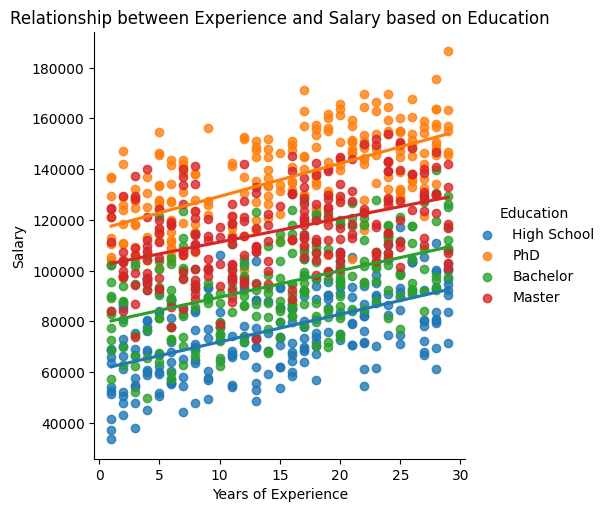

In [13]:
sns.lmplot(x='Experience', y='Salary', hue='Education', ci=False, data=df)
plt.title('Relationship between Experience and Salary based on Education')
plt.xlabel('Years of Experience')
plt.show()

### Summary Statistics

1. Direction Changes

The relationship between years of experience and salary is positive for all levels of education.

2. Shape changes

The shape of the relationship between years of experience and salary is linear for all levels of educations.

3. Strength changes

To better see the strength of the relationship for different values of education, we can look at correlation.

In [14]:
df[['Education', 'Experience', 'Salary']].groupby('Education').corr()

Experience    Salary
Education                                   
Bachelor    Experience    1.000000  0.490315
            Salary        0.490315  1.000000
High School Experience    1.000000  0.551464
            Salary        0.551464  1.000000
Master      Experience    1.000000  0.450723
            Salary        0.450723  1.000000
PhD         Experience    1.000000  0.628132
            Salary        0.628132  1.000000

The strength of the relationship between years of experience and salary is strongest for PhD, and is weakest with Master level of education. High School is the second strongest, followed by Bachelor.

4. Outlier differences

There are some outliers for all levels of education.

5. Slope changes

The slope of the relationship between years of experience and salary is noticeably steepest for PhD level of experience compared to all other types. The slope is slightly less steep for Master level of experience than for Bachelor and High School.

### Research Question Answer

The relationship between years of experience and salary can change depending on education level, where individuals with PhD's have the greatest rate of increase in the salary with higher years of experience compared to other education levels. Individuals with Master's, Bachelor's, and High School degrees have lower rates of increase, with Master's seeing the lowest rate of increase of salary with increasing years of experience.

## 5. Conclusion

### Summarization

For individuals with PhD's, the slope of the relationship between years of experience and salary is steeper than for the other three education levels in the dataset. This means that individuals with PhD's see a higher rate of salary increase for more years of experience than for any other level of education. It's also worth noting that this rate is about the same for the other three education levels, although individuals with Master's see the lowest rate of increase of salary across years of experience.

### Shortcomings / Caveats

One shortcoming of this analysis is that, like mentioned previously, the data in the dataset was collected via simulation and is synthetic. Because of this, the data cleaning process was simplified, but as a result, the data might not be as accurate or realistic than if it was naturally collected from real people.
Another caveat is that we used a limited amount of data in our analysis, just the three variables experience, salary, and education. This might impact the type of individual mentioned in the motivation that is looking for the degree that will have the highest rate of salary increase over less years of experience because not all degrees are created equally. For example, your major and school you go to also have impacts on salary.

### Future Work

One idea that I have for future work based on this analysis is to look at gender as a categorical variable. This way, we can visualize if there is any bias between genders for the rate of increase of salary depending on your gender. I think this would be important because some pay disparity between genders still exists today, unfortunately.